In [638]:
#importing important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

**Problem Statement:** To get basic inisights from the given data of netflix and recommend which movies or shows to produce and how we can grow  business in different countries

In [639]:
#importing data from local system
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [640]:
df.shape

(8807, 12)

In [641]:
#getting basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [642]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


- here we can see total of 8807 rows 
- we have show_id and title 8807 unique values 
- so we can use these two as primary key if we want to operations

In [643]:
#checking for missing values
df.isna().sum(axis=0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We have some missing values in:
- director : 2634
- cast : 825
- country : 831
- date_added : 10
- duration : 3

In [644]:
#now we can see some listed in, cast have comma seperated value so we have to clean some data

In [645]:
#creating new data set of actors keeping title name as Primary key
cons = df['cast'].apply(lambda x: str(x).split(',')).tolist()
df_new1 = pd.DataFrame(cons,index = df['title'])
df_new1 = df_new1.stack()
df_new1 = pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns = {0:'Actors'},inplace=True)
df_new1.drop(columns = ['level_1'],inplace=True)
df_new1.head(5)

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [646]:
#creating new data set of directors keeping title name as Primary key
cons2 = df['director'].apply(lambda x: str(x).split(',')).tolist()
df_new2 = pd.DataFrame(cons2,index = df['title'])
df_new2 = df_new2.stack()
df_new2 = pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns = {0:'Director'},inplace=True)
df_new2.drop(columns = ['level_1'],inplace=True)
df_new2.head(5)

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [647]:
#creating new data set of Genre keeping title name as Primary key
cons3 = df['listed_in'].apply(lambda x: str(x).split(',')).tolist()
df_new3 = pd.DataFrame(cons3,index = df['title'])
df_new3 = df_new3.stack()
df_new3 = pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns = {0:'Genre'},inplace=True)
df_new3.drop(columns = ['level_1'],inplace=True)
df_new3.head(5)

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [649]:
#creating new data set of Country keeping title name as Primary key
cons4 = df['country'].apply(lambda x: str(x).split(',')).tolist()
df_new4 = pd.DataFrame(cons4,index = df['title'])
df_new4 = df_new4.stack()
df_new4 = pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns = {0:'Country'},inplace=True)
df_new4.drop(columns = ['level_1'],inplace=True)
df_new4.head(5)

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [650]:
#merging all the data
df_new5 = df_new2.merge(df_new1,on=['title'],how='inner')
df_new6 = df_new5.merge(df_new3,on=['title'],how='inner')
df_new = df_new6.merge(df_new4,on=['title'],how='inner')
df_new['Actors'].replace(['nan'],['unknown actors'],inplace=True)
df_new['Director'].replace(['nan'],['unknown directors'],inplace=True)
df_new['Country'].replace(['nan'],[np.nan],inplace=True)
df_new.head(5)

,title,Director,Actors,Genre,Country
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actors,Documentaries,United States
1,Blood & Water,unknown directors,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,unknown directors,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,unknown directors,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,unknown directors,Khosi Ngema,International TV Shows,South Africa


In [651]:
#merging the data with basic dataset
df_final = df_new.merge(df[['show_id','type','title','date_added','release_year','rating','duration']],on = ['title'],how = 'left')
df_final.head(10)

,title,Director,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actors,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,unknown directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,unknown directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,unknown directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,unknown directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
5,Blood & Water,unknown directors,Khosi Ngema,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
6,Blood & Water,unknown directors,Khosi Ngema,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
7,Blood & Water,unknown directors,Gail Mabalane,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
8,Blood & Water,unknown directors,Gail Mabalane,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
9,Blood & Water,unknown directors,Gail Mabalane,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [652]:
#checking for null values
df_final.isnull().sum()

title               0
Director            0
Actors              0
Genre               0
Country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

After taking care of comma seperated values, we have following null values:
- Country : 11897
- date_added : 158
- rating : 67
- duration : 3

In [653]:
#duration null value
df_final.loc[df_final['duration'].isnull()]

,title,Director,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,NaN
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,NaN
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,NaN


In [654]:
#now rating can't be in number so replacing the value of rating with duration
df_final.loc[df_final['duration'].isnull(),'duration'] = df_final.loc[df_final['duration'].isnull(), 'rating']
df_final.loc[df_final['rating'].str.contains('min',na = False), 'rating'] = 'NR'
df_final['rating'].fillna('NR',inplace = True)

In [655]:
# handling missing data of date_added
# we will replace the data with 1st Jan of release year
index = list(df_final[df_final.isnull()['date_added'] == True].index)
df_final.loc[index,'date_added'] = ['January 1, ' + str(i) for i in df_final.loc[index,'release_year']]

In [656]:
#changing all the Country null values to Unknow country
df_final.loc[df_final['Country'].isnull(),'Country'] = 'Unknown Country'

In [657]:
#changing the date type and separting the month and date
df_final['month'] = pd.to_datetime(df_final['date_added']).dt.month
df_final['date'] = pd.to_datetime(df_final['date_added']).dt.day
df_final.head(10)

,title,Director,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,month,date
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actors,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,9,25
1,Blood & Water,unknown directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,9,24
2,Blood & Water,unknown directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,9,24
3,Blood & Water,unknown directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,9,24
4,Blood & Water,unknown directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,9,24
5,Blood & Water,unknown directors,Khosi Ngema,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,9,24
6,Blood & Water,unknown directors,Khosi Ngema,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,9,24
7,Blood & Water,unknown directors,Gail Mabalane,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,9,24
8,Blood & Water,unknown directors,Gail Mabalane,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,9,24
9,Blood & Water,unknown directors,Gail Mabalane,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,9,24


In [658]:
#checking for duplicates
df_final.loc[df_final.duplicated()]

,title,Director,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,month,date
39354,Rust Creek,Jen McGowan,Micah Hauptman,Thrillers,United States,s1632,Movie,"November 30, 2020",2018,R,108 min,11,30
135656,300 Miles to Heaven,Maciej Dejczer,Adrianna Biedrzyńska,Dramas,Denmark,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,10,1
135657,300 Miles to Heaven,Maciej Dejczer,Adrianna Biedrzyńska,Dramas,France,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,10,1
135658,300 Miles to Heaven,Maciej Dejczer,Adrianna Biedrzyńska,Dramas,Poland,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,10,1
135659,300 Miles to Heaven,Maciej Dejczer,Adrianna Biedrzyńska,International Movies,Denmark,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,10,1
135660,300 Miles to Heaven,Maciej Dejczer,Adrianna Biedrzyńska,International Movies,France,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,10,1
135661,300 Miles to Heaven,Maciej Dejczer,Adrianna Biedrzyńska,International Movies,Poland,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,10,1


In [659]:
#dropping Duplicates
df_final.drop_duplicates(inplace = True)

In [660]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202058 entries, 0 to 202064
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         202058 non-null  object
 1   Director      202058 non-null  object
 2   Actors        202058 non-null  object
 3   Genre         202058 non-null  object
 4   Country       202058 non-null  object
 5   show_id       202058 non-null  object
 6   type          202058 non-null  object
 7   date_added    202058 non-null  object
 8   release_year  202058 non-null  int64 
 9   rating        202058 non-null  object
 10  duration      202058 non-null  object
 11  month         202058 non-null  int64 
 12  date          202058 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 21.6+ MB


In [661]:
df_final.describe(include='all')

,title,Director,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,month,date
count,202058,202058,202058,202058,202058,202058,202058,202058,202058.000000,202058,202058,202058.000000,202058.00000
unique,8807,5121,39297,73,198,8807,2,1772,NaN,14,220,NaN,NaN
top,Kahlil Gibran's The Prophet,unknown directors,unknown actors,International Movies,United States,s7165,Movie,"January 1, 2020",NaN,TV-MA,1 Season,NaN,NaN
freq,700,50643,2149,27138,49867,700,145910,3730,NaN,73915,35035,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.449653,NaN,NaN,6.632017,12.17493
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.012781,NaN,NaN,3.444465,9.84815
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,1.000000,1.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,4.000000,1.00000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,7.000000,12.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,10.000000,20.00000


In [662]:
# now we dont have any missing values so we can start analysing the data

In [663]:
df_final.head(5)

,title,Director,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,month,date
0,Dick Johnson Is Dead,Kirsten Johnson,unknown actors,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,9,25
1,Blood & Water,unknown directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,9,24
2,Blood & Water,unknown directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,9,24
3,Blood & Water,unknown directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,9,24
4,Blood & Water,unknown directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,9,24


In [664]:
df_final['title'].nunique() # we have 8807 unique movies

8807

In [665]:
go.Figure(data=[go.Pie(labels=df_final.type.value_counts(normalize=True).index, 
                       values=df_final.type.value_counts(normalize=True).values, 
                       hole=.5, title="Movies vs TV Shows")])

In [666]:
df_final.groupby('Director').agg({'title':'nunique'}).sort_values(by='title',ascending=False).head(10)
# here we can see highest occuring director is Rajiv Chilaka

,title
Director,
unknown directors,2634
Rajiv Chilaka,22
Jan Suter,18
Raúl Campos,18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Jay Chapman,12


In [667]:
df_final.groupby('Actors').agg({'title':'nunique'}).sort_values(by='title',ascending=False).head(10)
# Anupam Kher has highest number of occurance

,title
Actors,
unknown actors,825
Anupam Kher,39
Rupa Bhimani,31
Takahiro Sakurai,30
Julie Tejwani,28
Om Puri,27
Rajesh Kava,26
Shah Rukh Khan,26
Andrea Libman,25


In [668]:
df_final.groupby('Country').agg({'title':'nunique'}).sort_values(by='title',ascending=False).head(10)
# most customers of netflix is in United States followed by India

,title
Country,
United States,3211
India,1008
Unknown Country,831
United Kingdom,628
United States,479
Canada,271
Japan,259
France,212
South Korea,211


In [669]:
df_final.groupby('Genre').agg({'title':'nunique'}).sort_values(by='title',ascending=False).head(10)
# most customers of netflix is in United States followed by India

,title
Genre,
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
Dramas,827
International TV Shows,774
Independent Movies,736
TV Dramas,696


In [670]:
df_director = df_final.groupby('Director').agg({'title':'nunique'}).sort_values(by='title',ascending=False).reset_index().head(10) 
df_director = df_director.loc[df_director['Director'] != 'unknown directors']
df_director

,Director,title
1,Rajiv Chilaka,22
2,Jan Suter,18
3,Raúl Campos,18
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12


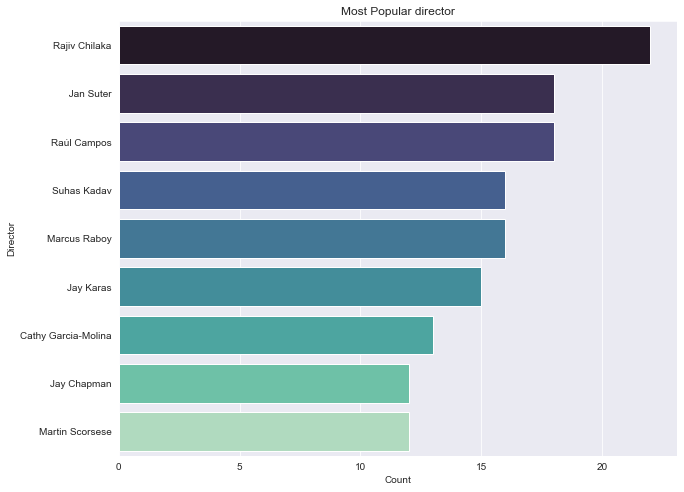

In [671]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
sns.barplot(data = df_director,
              x = 'title',
            y = 'Director',
              palette='mako')
plt.xlabel('Count')
plt.title('Most Popular director')
plt.show()

In [672]:
df_actor = df_final.groupby('Actors').agg({'title':'nunique'}).sort_values(by='title',ascending=False).reset_index().head(10) 
df_actor = df_actor.loc[df_actor['Actors'] != 'unknown actors']
df_actor

,Actors,title
1,Anupam Kher,39
2,Rupa Bhimani,31
3,Takahiro Sakurai,30
4,Julie Tejwani,28
5,Om Puri,27
6,Rajesh Kava,26
7,Shah Rukh Khan,26
8,Andrea Libman,25
9,Boman Irani,25


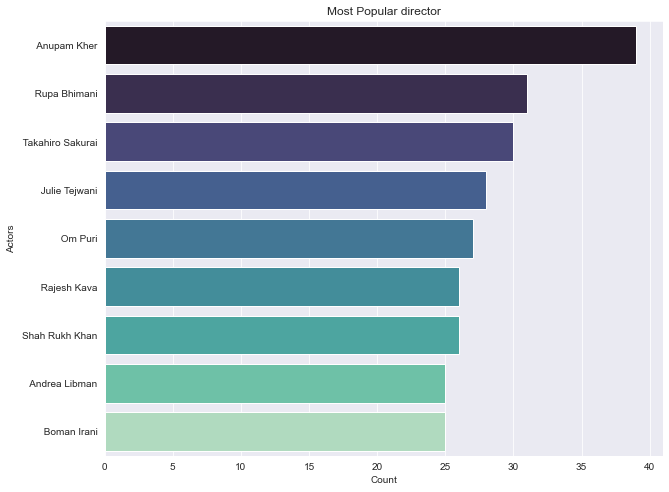

In [673]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
sns.barplot(data = df_actor,
              x = 'title',
            y = 'Actors',
              palette='mako')
plt.xlabel('Count')
plt.title('Most Popular director')
plt.show()

In [674]:
df_Country = df_final.groupby(['Country']).agg({'title':'nunique'}).sort_values(by='title',ascending=False).reset_index().head(10)
df_Country = df_Country.loc[df_Country['Country'] != 'Unknown Country']
df_Country

,Country,title
0,United States,3211
1,India,1008
3,United Kingdom,628
4,United States,479
5,Canada,271
6,Japan,259
7,France,212
8,South Korea,211
9,Spain,181


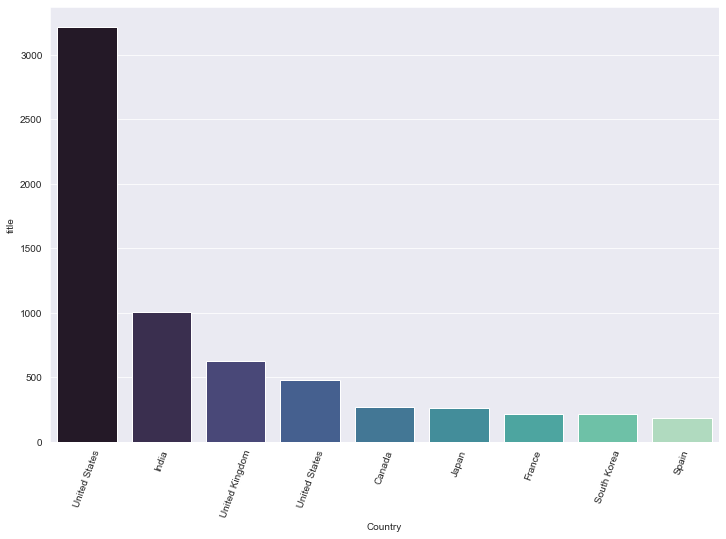

In [675]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(12,8))
plt.xticks(rotation=70)
sns.barplot(data = df_Country,x= 'Country', y='title', orient='v',palette='mako')

plt.show()

In [676]:
df_genre = df_final.groupby('Genre').agg({'title':'nunique'}).reset_index()
df_genre = df_genre.sort_values(by = 'title',ascending = False).head(10)

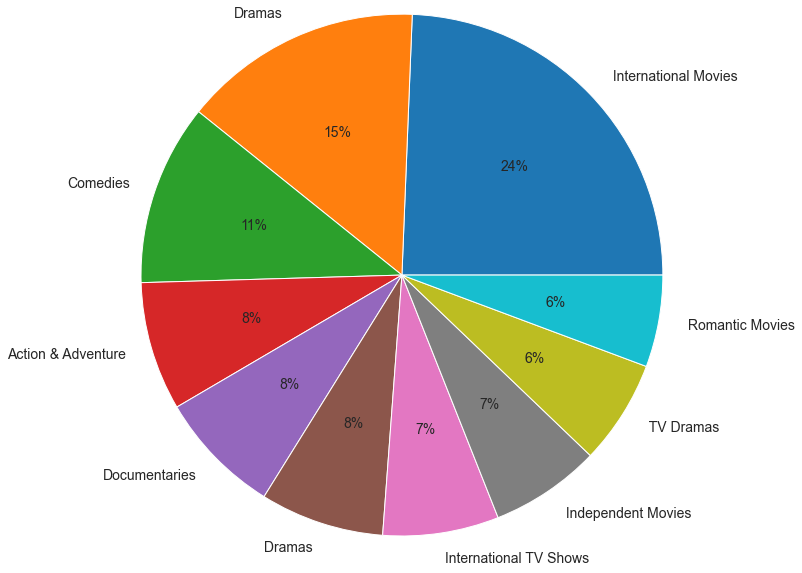

In [677]:
plt.pie(df_genre['title'], labels=df_genre['Genre'], autopct='%.0f%%', radius=3, textprops={'fontsize': 14})
plt.show()

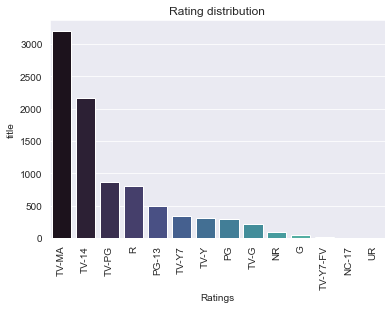

In [678]:
df_rating = df_final.groupby('rating').agg({'title':'nunique'}).reset_index()
df_rating = df_rating.sort_values(by = 'title',ascending = False)
sns.barplot(data = df_rating,
              x = 'rating',
            y = 'title',
              palette='mako')
plt.xlabel('Ratings')
plt.xticks(rotation = 90)
plt.title('Rating distribution')
plt.show()

In [679]:
#seperating movie and tv series 
df_final_movie = df_final.loc[df_final['type']=='Movie']
df_final_tv_show = df_final.loc[df_final['type']=='TV Show']

Text(0.5, 1.0, 'TV Shows released per year')

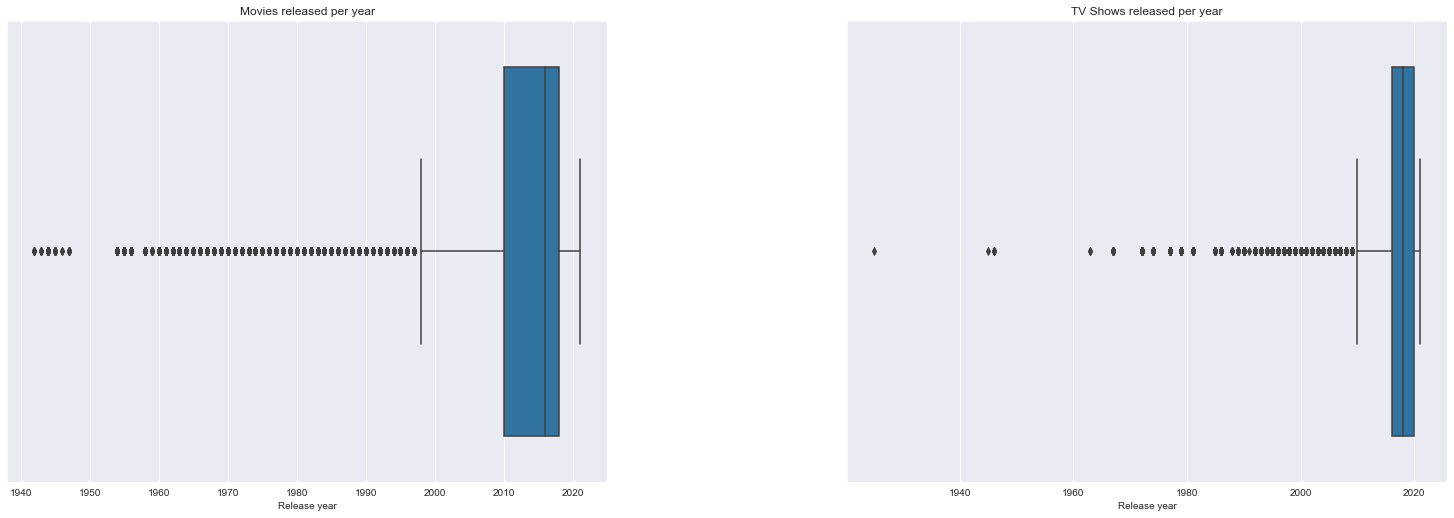

In [680]:
#Checking for outlires
fig = plt.figure(figsize=(25,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(1,2,1)
sns.boxplot(data = df_final_movie ,
            x = 'release_year')
plt.xlabel('Release year')
plt.title('Movies released per year')

plt.subplot(1,2,2)
sns.boxplot(data = df_final_tv_show ,
            x = 'release_year')
plt.xlabel('Release year')
plt.title('TV Shows released per year')

- now in this we can see movies released before 1995 can be considered as outliner
- similarly tv series came into trend after 2010

In [681]:
#now we consider data from 1990 to 2021, as before that the data is quite less
df_final_movie = df_final_movie.loc[df_final_movie['release_year']>=1990]
df_final_tv_show = df_final_tv_show.loc[df_final_tv_show['release_year']>=1990]

In [682]:
#now we have to change the duration of both tv series and movies 
new = df_final_movie['duration'].str.split(' ',expand=True)
df_final_movie['duration'] = new[0]
df_final_movie['duration'] = df_final_movie['duration'].astype(float)

new = df_final_tv_show['duration'].str.split(' ',expand=True)
df_final_tv_show['duration'] = new[0]
df_final_tv_show['duration'] = df_final_tv_show['duration'].astype(float)

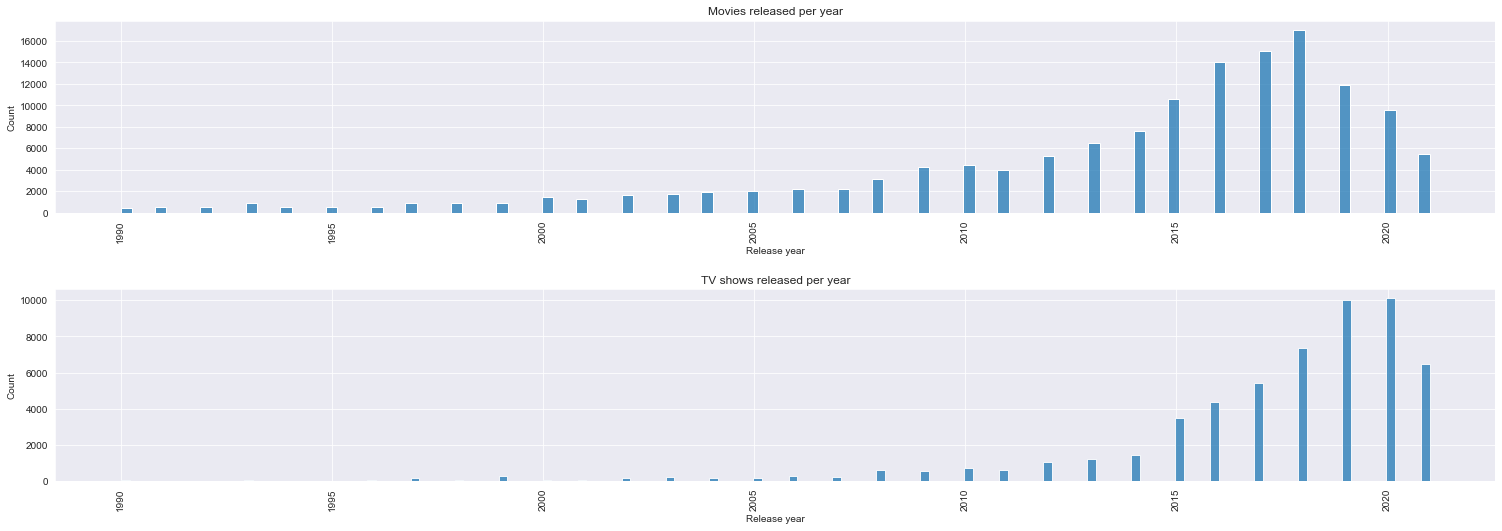

In [683]:
fig = plt.figure(figsize=(25,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(2,1,1)
sns.histplot(df_final_movie['release_year'])
plt.xticks(rotation = 90,fontsize=10)
plt.xlabel('Release year')
plt.title('Movies released per year')

plt.subplot(2,1,2)
sns.histplot(df_final_tv_show['release_year'])
plt.xticks(rotation = 90)
plt.xlabel('Release year')
plt.title('TV shows released per year')


plt.show()

- As we can see there is a increase in both TV series and Movies
- But for last 5 years the TV series have been increased more as compared to Movies

In [684]:
#making dataset according to date and month
df7 = df_final_movie.groupby(['date','month']).agg({'title':'nunique'}).reset_index()
df8 = df_final_tv_show.groupby(['date','month']).agg({'title':'nunique'}).reset_index()

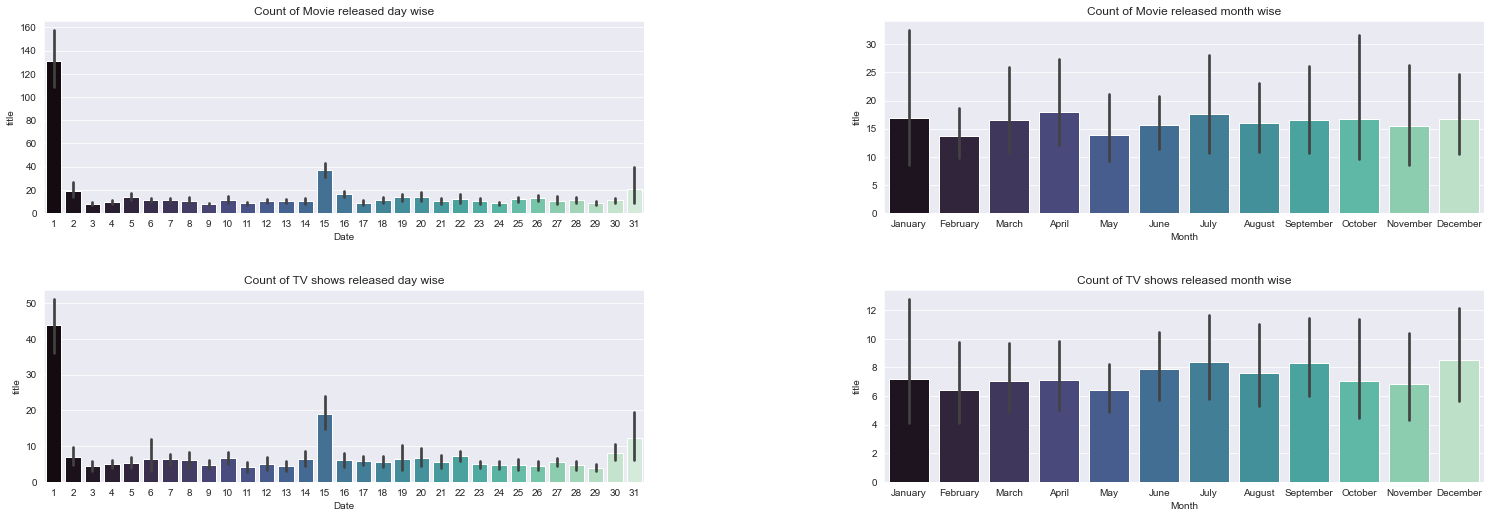

In [685]:
# now if we check which month and date will more movie and tv series are released
fig = plt.figure(figsize=(25,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(2,2,1)
sns.barplot(data = df7,
              x = 'date',
            y = 'title',
           palette='mako')
plt.xlabel('Date')
plt.title('Count of Movie released day wise')

plt.subplot(2,2,2)
sns.barplot(data = df7,
              x = 'month',
              y = 'title',
           palette='mako')
plt.xlabel('Month')
plt.xticks([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0],['January','February','March','April',
                   'May','June','July','August','September','October','November','December'])
plt.title('Count of Movie released month wise')


plt.subplot(2,2,3)
sns.barplot(data = df8,
              x = 'date',
            y = 'title',
              palette='mako')
plt.xlabel('Date')
plt.title('Count of TV shows released day wise')

plt.subplot(2,2,4)
sns.barplot(data = df8,
              x = 'month',
              y = 'title',
              palette='mako')
plt.xlabel('Month')
plt.xticks([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0],['January','February','March','April',
                   'May','June','July','August','September','October','November','December'])
plt.title('Count of TV shows released month wise')

plt.show()

- We can see movie and tv show released is mostly in the start or mid of the month
- the Tv show and movie are released usually on December, January and July month

In [686]:
df5 = df_final_movie.groupby('release_year').agg({'duration':'mean'}).reset_index()
df6 = df_final_tv_show.groupby('release_year').agg({'duration':'mean'}).reset_index()

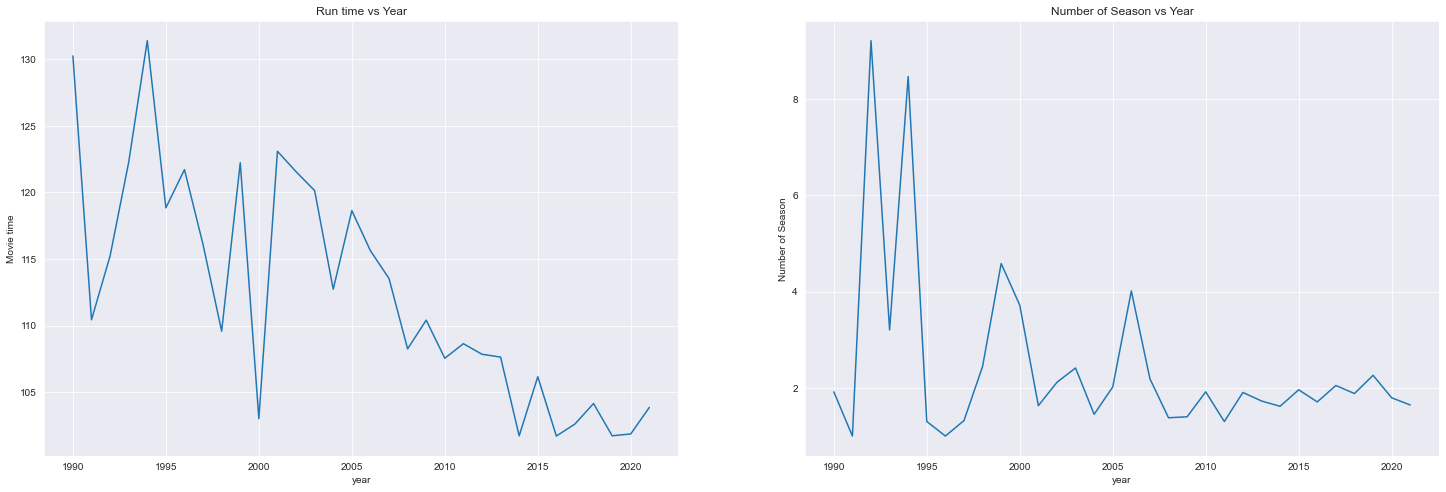

In [687]:
fig = plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
sns.lineplot(data = df5,
                x = 'release_year',
                y = 'duration',
                )
plt.xlabel('year')
plt.ylabel('Movie time')
plt.title('Run time vs Year')

plt.subplot(1,2,2)
sns.lineplot(data = df6,
                x = 'release_year',
                y = 'duration',
                )
plt.xlabel('year')
plt.ylabel('Number of Season')
plt.title('Number of Season vs Year')

plt.show()

- We can see that the movie average time decreaing over the years
- the seasons are also reducing over the years

In [688]:
df_country_genre = df_final.groupby(['Country','Genre']).agg({'title':'count'}).reset_index()
df_country_genre

,Country,Genre,title
0,,Dramas,9
1,,Independent Movies,8
2,,International Movies,40
3,,TV Dramas,4
4,,Classic Movies,9
...,...,...,...
2496,West Germany,International Movies,2
2497,West Germany,Documentaries,2
2498,Zimbabwe,International Movies,12
2499,Zimbabwe,Romantic Movies,12


In [689]:
#lets check for top countries like United States, India, United Kingdom, Canada and Japan
df_US = df_country_genre.loc[df_country_genre['Country']=='United States'][['Genre','title']].sort_values(by='title',ascending=False).reset_index().head(5)
df_India = df_country_genre.loc[df_country_genre['Country']=='India'][['Genre','title']].sort_values(by='title',ascending=False).reset_index().head(5)
df_UK = df_country_genre.loc[df_country_genre['Country']=='United Kingdom'][['Genre','title']].sort_values(by='title',ascending=False).reset_index().head(5)
df_Canada = df_country_genre.loc[df_country_genre['Country']=='Canada'][['Genre','title']].sort_values(by='title',ascending=False).reset_index().head(5)
df_Japan = df_country_genre.loc[df_country_genre['Country']=='Japan'][['Genre','title']].sort_values(by='title',ascending=False).reset_index().head(5)

<function matplotlib.pyplot.show(close=None, block=None)>

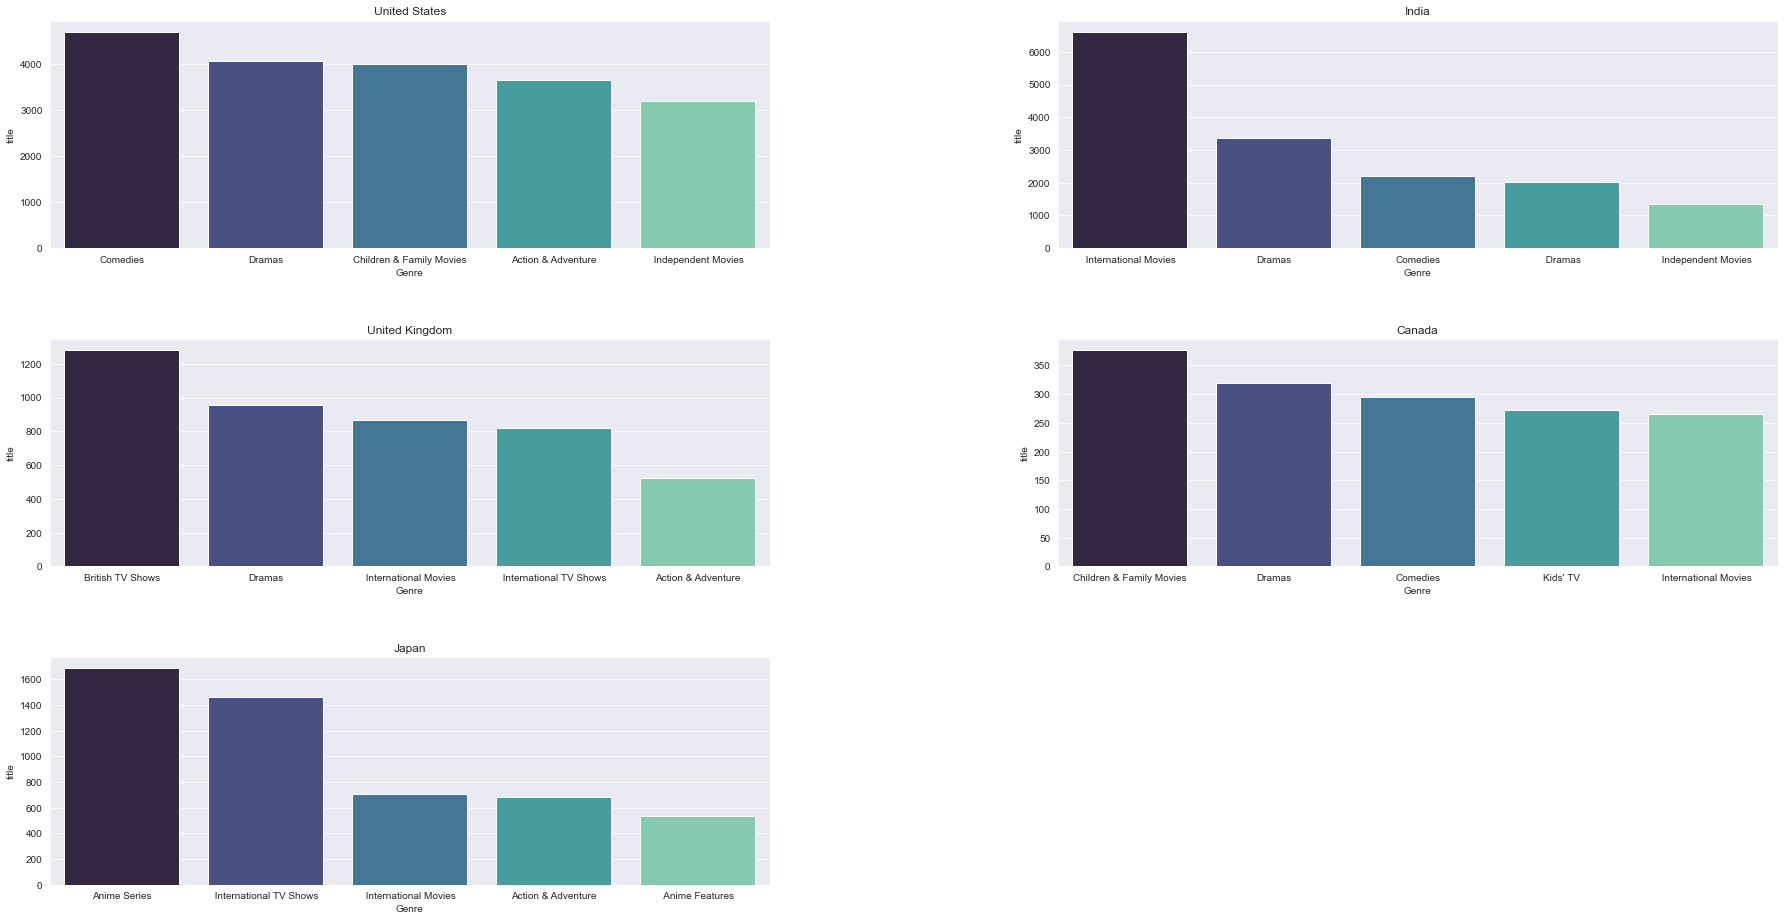

In [690]:
#lets check for top countries like United States, India, United Kingdom, Canada and Japan
fig = plt.figure(figsize=(30,15))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(3,2,1)
sns.barplot(data = df_US,
             x = 'Genre',
              y = 'title',
            palette='mako'
             )
plt.xticks(fontsize=10)
plt.xlabel('Genre')
plt.title('United States')

plt.subplot(3,2,2)
sns.barplot(data = df_India,
             x = 'Genre',
              y = 'title',
            palette='mako'
             )
plt.xticks(fontsize=10)
plt.xlabel('Genre')
plt.title('India')

plt.subplot(3,2,3)
sns.barplot(data = df_UK,
             x = 'Genre',
              y = 'title',
            palette='mako'
             )
plt.xticks(fontsize=10)
plt.xlabel('Genre')
plt.title('United Kingdom')

plt.subplot(3,2,4)
sns.barplot(data = df_Canada,
             x = 'Genre',
              y = 'title',
            palette='mako'
             )
plt.xticks(fontsize=10)
plt.xlabel('Genre')
plt.title('Canada')

plt.subplot(3,2,5)
sns.barplot(data = df_Japan,
             x = 'Genre',
              y = 'title',
            palette='mako'
             )
plt.xticks(fontsize=10)
plt.xlabel('Genre')
plt.title('Japan')

plt.show

We can see theb top Genre across top country with maximum customers
- United States
    - Comedies 
    - Dramas
    - Children and family movies
- India
    - International Movies
    - Dramas
    - Comedies
- United Kingdom
    - British TV show
    - Dramas
    - International Movies
- Canada
    - Children and family movies
    - Dramas
    - Comedies
- Japan
    - Anime Series
    - International TV shows
    - International Movies

In [691]:
# Director - Actor Duo
df_actor_director_duo = df_final.groupby(['Director','Actors']).agg({'title':'count'}).reset_index().sort_values(by = 'title',ascending = False)
df_actor_director_duo = df_actor_director_duo.loc[(df_actor_director_duo['Director'] != 'unknown directors') & (df_actor_director_duo['Actors'] != 'unknown actors')].head(20)
df_actor_director_duo['Director-Actor'] = df_actor_director_duo['Director'] + str('-') + df_actor_director_duo['Actors']
df_actor_director_duo

,Director,Actors,title,Director-Actor
27312,Lars von Trier,Charlotte Gainsbourg,33,Lars von Trier-Charlotte Gainsbourg
27310,Lars von Trier,Uma Thurman,33,Lars von Trier- Uma Thurman
27309,Lars von Trier,Stellan Skarsgård,33,Lars von Trier- Stellan Skarsgård
27307,Lars von Trier,Stacy Martin,33,Lars von Trier- Stacy Martin
27306,Lars von Trier,Sophie Kennedy Clark,33,Lars von Trier- Sophie Kennedy Clark
27305,Lars von Trier,Shia LaBeouf,33,Lars von Trier- Shia LaBeouf
27300,Lars von Trier,Christian Slater,33,Lars von Trier- Christian Slater
48202,Wilson Yip,Donnie Yen,26,Wilson Yip-Donnie Yen
6946,Alastair Fothergill,David Attenborough,26,Alastair Fothergill-David Attenborough
46579,Toshiya Shinohara,Satsuki Yukino,21,Toshiya Shinohara- Satsuki Yukino


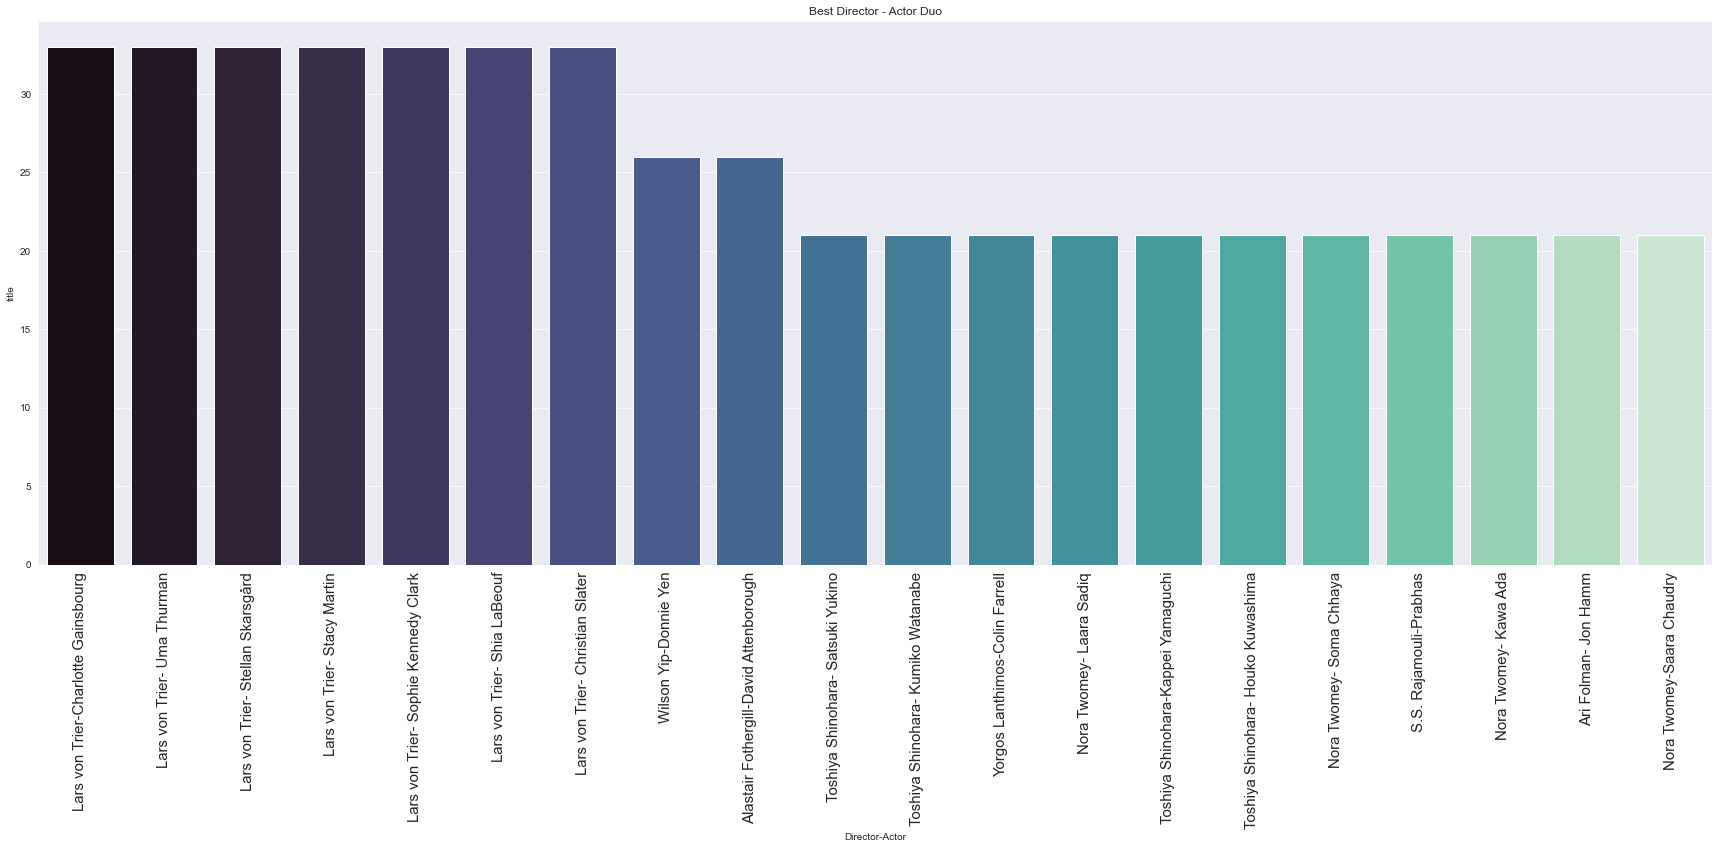

In [692]:
fig = plt.figure(figsize=(30,10))
sns.barplot(data = df_actor_director_duo,
           x = 'Director-Actor',
           y = 'title',
           palette='mako')
plt.xticks(rotation = 90,fontsize=15)
plt.title('Best Director - Actor Duo')
plt.show()

Best Director actor Duo is Lars von Trier with Christian Slater,Sophie Kennedy Clark, Stacy Martin, Stellan Skarsgård, Uma Thurman, Charlotte Gainsbourg and Shia LaBeouf

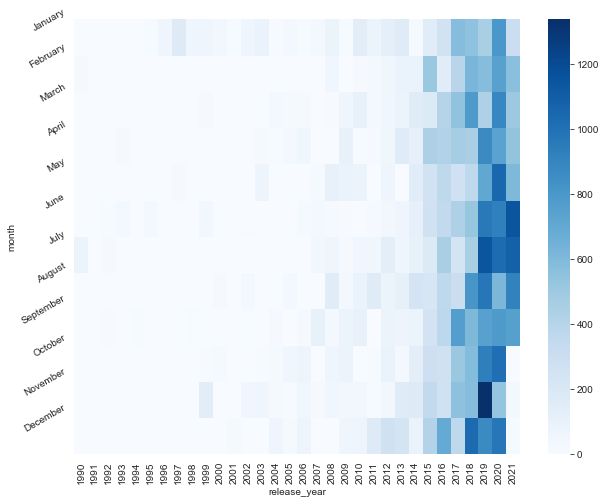

In [693]:
plt.figure(figsize=(10,8))
df_mon_year = df_final_tv_show.groupby('release_year')['month'].value_counts().unstack().fillna(0).T
sns.heatmap(df_mon_year,cmap ='Blues') #heatmap
plt.yticks([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0],['January','February','March','April',
                   'May','June','July','August','September','October','November','December'],rotation = 30)
plt.show()

- most of the movie are released in 2019 November month

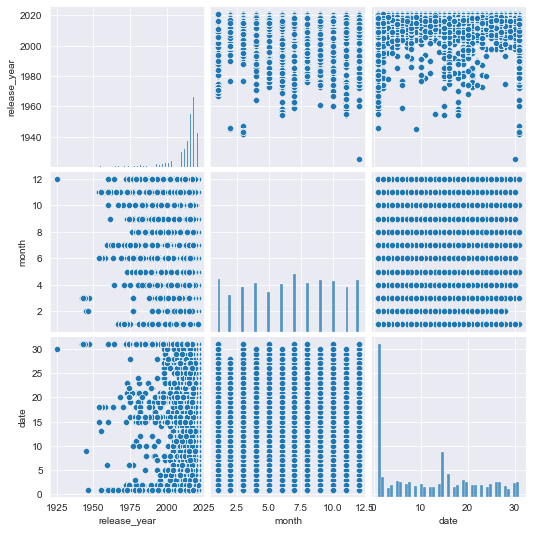

In [694]:
sns.pairplot(data= df_final)
plt.show()

#  Recommendations:

- The count of users of netflix is most in US, followed by India and UK.
- Drama genre is common in all these 3 countries, so more movies and tv show of drama Genre should be considered in making.
- Best time of releasing a movie or tv show is at month end or month starting, so this can also be considered before releasing.
- We can also see that middle of the year and end of the year is the best time to release movie or tv series.
- Growth of tv series over the past few years is quite massive as compared to movies, so more focus can be given in making tv series.
- The trend clearly shows that movies duration have reduced over the years and this is prefered by people